# Processing data from pendulum experiement

The following simulation explores the accuracy and reliability of two methods commonly used to minimise the impact of random errors on an experiment to determine acceleration due to gravity using a simple pendulum. 

### Methods simulated
Method 1 - averaging values for l/T^2 obtained for each data point
Mehod 2 - linear regression

### Simulation
The results of each method are compared for a number of simulated investigations as follows:
1. User inputs details of the method used in the experiement including the number of lengths tested, maximum length measured, number of oscillations observed and estimations of uncertainties associated with each measurment (e.g. 0.01 m for length and 0.5 s for time)
2. User selects to use either randomly selected length measurements within the range of lengths specifed (by running the 1st simulation below) or to use evenly spaced length measurements across the range (by running the 2nd simulation)
3. Simulation runs the experiment using the same input measurements and errors and plots the resulting values of 'g' determined to a histogram with associated statistics for mean and standard deviation to allow a comparison to be made. 

#### Generating data
Both methods process the same data in each simulated experiment and it is generated as follows.
1. The lengths used in each experiment are determined either randomly or evenly spaced as described above. As the dependent variable, it is assumed that these values are the lengths that students set and record, i.e. the measured lengths.
2. Error is then assigned to each of these measurements by adding a random error (normal/gaussian distribution) approximately within the range specified to the measured length to obtain a value for the true length of the pendulum.
3. The true length is used to determine the true period of the pendulum using the pendulum equation.
4. Error is assigned to the true period using a method similar to that used for lengths to determine the period that would be measured by students. Note: the error is divided by the number of oscillations observed for each length.
5. The output is a set of values for the length and period that students would have measured.

#### Processing data
Method 1
1. For each pair of measured lengths and periods, l/t^2 is calucalted
2. The mean value of l/t^2 is calculated
3. 'g' is calculated using g=4*pi^2*mean
Method 2
1. for the paired array of length and period^2 results of each experiment, the numpy regression funciton is used to estimate the coefficients of the regression line.
2. 'g' is calculated using g=4*pi^2/beta1

# Input details of experiements

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

#input experiment variables
g=9.81
print("Enter number of lengths tested")
num_measure=int(input())
print("Enter maximum length measurement (in meters)")
max_len_measured=float(input())
print("Enter max length error (in meters)")
max_len_error=float(input())
print("Enter number of oscillations measured")
num_osc=int(input())
print("Enter max time error (in seconds)")
max_t_error=float(input())

# Simulation 1 - randomly assigned values for pendulum lengths
You will be asked to input the number of simulations to run, 500 is sufficient to produce a stable result

Enter number of simulations you wish to run
500

Pendulum results comparison
 Details:
 Number of simulated trials= 500 
 5 measurements made, 
Lengths ranging from 0 to  2.0 m 
Each measurement with uncertainty of +/-  0.01 m
Time taken for 20  oscillations recorded with an uncertainty of +/- 0.5 s

Mean method 
Estimates for g between  5.78  and  20.36 ms-2
average =  10.0 ms-2  and standard deviation =  1.89

Regression method 
Estimates for g between  7.8  and  12.65 ms-2
average =  9.84 ms-2  and standard deviation =  0.79


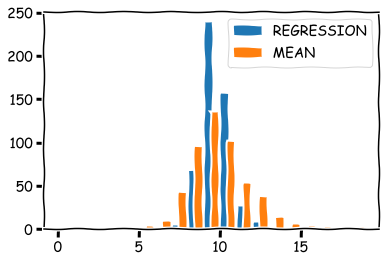

In [7]:
g_mean_results=[]
g_reg_results=[]
print("Enter number of simulations you wish to run")
sim_count=int(input())

for i in range(sim_count):
    #generate random set of measured lengths and errors for each trial
    l_measured=np.random.random(num_measure)*max_len_measured
    l_measured=np.add(l_measured,0.1)
    l_delta=np.random.normal(0,0.3,num_measure)*max_len_error
    t_delta=np.random.normal(0,0.3)*max_t_error
    #calculate the actual length by adjusting measured length by the random error
    len_actual=np.array(l_delta+l_measured)
    #calculate the actual period using pendulum equation
    t_actual=2*np.pi*np.sqrt(len_actual/g)
    #determine the period that would be measured when including error
    t_measured=np.array(t_actual+t_delta)
    t_m_squared=np.power(t_measured,2)
    l_on_tsqrd=np.divide(l_measured,t_m_squared)
    #estimate value of g using mean method
    g_mean=round(4*np.pi**2*np.mean(l_on_tsqrd),3)
    g_mean_results.append(g_mean)
    #estimate value of g using regression method
    x=np.array([l_measured]).reshape((-1,1))
    y=np.array([t_m_squared]).reshape((-1,))
    model=LinearRegression()
    model.fit(x, y)
    gradient=model.coef_[0]
    g_reg=round(4*np.pi**2/gradient,3)
    g_reg_results.append(g_reg)
else:    
    g_mean_method=np.array(g_mean_results)
    g_reg_method=np.array(g_reg_results)
    #Generate printout of simulation results
    print("\nPendulum results comparison\n Details:\n Number of simulated trials=",sim_count,"\n", num_measure,"measurements made, \nLengths ranging from 0 to ",max_len_measured,"m","\nEach measurement with uncertainty of +/- ",max_len_error,"m")
    print("Time taken for",num_osc," oscillations recorded with an uncertainty of +/-", max_t_error,"s")
    print("\nMean method \nEstimates for g between ",round(min(g_mean_results),2)," and ",round(max(g_mean_results),2),"ms-2")
    print("average = ",round(np.mean(g_mean_results),2),"ms-2"," and standard deviation = ",round(np.std(g_mean_results),2))
    print("\nRegression method \nEstimates for g between ",round(min(g_reg_results),2)," and ",round(max(g_reg_results),2),"ms-2")
    print("average = ",round(np.mean(g_reg_results),2),"ms-2"," and standard deviation = ",round(np.std(g_reg_results),2))
#set histogram plot range if requried
lower_g=int(round(min(g_mean_results)))
upper_g=int(round(max(g_mean_results)))

#Plot histogram to visualy compare the spread of results
#set lower bin to 0 by hashing out the first plt.hist and using the second expression

#plt.hist([g_reg_results,g_mean_results],range(lower_g,19+1,1),label=["Regression model","Mean model"])
with plt.xkcd(scale=.5,length=50):
    plt.hist([g_reg_results,g_mean_results],range(0,19+1,1),label=["REGRESSION","MEAN"])
    plt.legend(loc=0)
    plt.show()


# Simulation 2 - evenly spaced pendulum lengths tested
As above, input the number of simulations you wish to run. The minimum length of pendulum can also be set in this model to avoid the large relative errors that would be produced when very short pendulum lengths are used. It is currently set to 0.4 m.

Enter number of simulations you wish to run
500

Pendulum results comparison
Details:
 Number of simulated trials= 500 
 5 measurements made in each trial, 
 Lengths ranging from 0.4  to  2.0 m 
 Each measurement with uncertainty of +/-  0.01 m
 Time taken for 20  oscillations recorded with an uncertainty of +/- 0.5 s

Mean method 
Estimates for g between  6.7  and  18.03 ms-2
average =  10.03 ms-2  and standard deviation =  1.69

Regression method 
Estimates for g between  8.11  and  12.82 ms-2
average =  9.87 ms-2  and standard deviation =  0.75


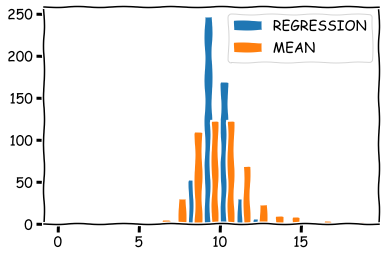

In [8]:
g_mean_results=[]
g_reg_results=[]
print("Enter number of simulations you wish to run")
sim_count=int(input())

#set minimum length of pendulum
min_len=0.4
for i in range(sim_count):
    #generate stepwise set of measured lengths and random errors for each trial
    l_measured=np.arange(min_len,max_len_measured+min_len,max_len_measured/num_measure)
    l_delta=np.random.normal(0,0.3,num_measure)*max_len_error
    t_delta=np.random.normal(0,0.3)*max_t_error
    #calculate the actual length by adjusting measured length by the random error
    len_actual=np.array(l_delta+l_measured)
    #calculate the actual period using pendulum equation
    t_actual=2*np.pi*np.sqrt(len_actual/g)
    #determine the period that would be measured when including error
    t_measured=np.array(t_actual+t_delta)
    t_m_squared=np.power(t_measured,2)
    l_on_tsqrd=np.divide(l_measured,t_m_squared)
    #estimate value of g using mean method
    g_mean=round(4*np.pi**2*np.mean(l_on_tsqrd),3)
    g_mean_results.append(g_mean)
    #estimate value of g using regression method
    x=np.array([l_measured]).reshape((-1,1))
    y=np.array([t_m_squared]).reshape((-1,))
    model=LinearRegression()
    model.fit(x, y)
    gradient=model.coef_[0]
    g_reg=round(4*np.pi**2/gradient,3)
    g_reg_results.append(g_reg)
else:    
    g_mean_method=np.array(g_mean_results)
    g_reg_method=np.array(g_reg_results)
    #Generate printout of simulation results
    print("\nPendulum results comparison\nDetails:\n Number of simulated trials=",sim_count,"\n",num_measure,"measurements made in each trial, \n Lengths ranging from",min_len," to ",max_len_measured,"m","\n Each measurement with uncertainty of +/- ",max_len_error,"m")
    print(" Time taken for",num_osc," oscillations recorded with an uncertainty of +/-", max_t_error,"s")
    print("\nMean method \nEstimates for g between ",round(min(g_mean_results),2)," and ",round(max(g_mean_results),2),"ms-2")
    print("average = ",round(np.mean(g_mean_results),2),"ms-2"," and standard deviation = ",round(np.std(g_mean_results),2))
    print("\nRegression method \nEstimates for g between ",round(min(g_reg_results),2)," and ",round(max(g_reg_results),2),"ms-2")
    print("average = ",round(np.mean(g_reg_results),2),"ms-2"," and standard deviation = ",round(np.std(g_reg_results),2))
#set histogram plot range if requried
lower_g=int(round(min(g_mean_results)))
upper_g=int(round(max(g_mean_results)))

#Plot histogram to visualy compare the spread of results
#set lower bin to 0 by hashing out the first plt.hist and using the second expression

#plt.hist([g_reg_results,g_mean_results],range(lower_g,19+1,1),label=["Regression model","Mean model"])
with plt.xkcd(scale=.5,length=50):
    plt.hist([g_reg_results,g_mean_results],range(0,19+1,1),label=["REGRESSION","MEAN"])
    plt.legend(loc=0)
    plt.show()